<a href="https://colab.research.google.com/github/ella417/ML_Study/blob/main/Siyeon_WK2_HW_MLstudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기 -> google drive에 업로드 후 마운트하는 방식 사용함

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# 라이브러리 불러오기
import pandas as pd  # 데이터프레임 다루기
import numpy as np
import seaborn as sns # 시각화 라이브러리
import matplotlib.pyplot as plt # 기본 그래프 그리기

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 데이터 불러오기
df = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

# 1. 타이타닉 데이터 불러오기
타이타닛 데이터 불러온 뒤 및 전체 구조(shape, info, describe) 간단히 확인하고 정리

In [27]:
df.info() # 변수명, 자료형, 결측치 개수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.shape # 행과 열 개수 확인 -> (행 수, 열 수) 튜플로 반환됨

(891, 12)

In [29]:
df.describe() # 수치형 변수의 요약 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. 결측치 시각화

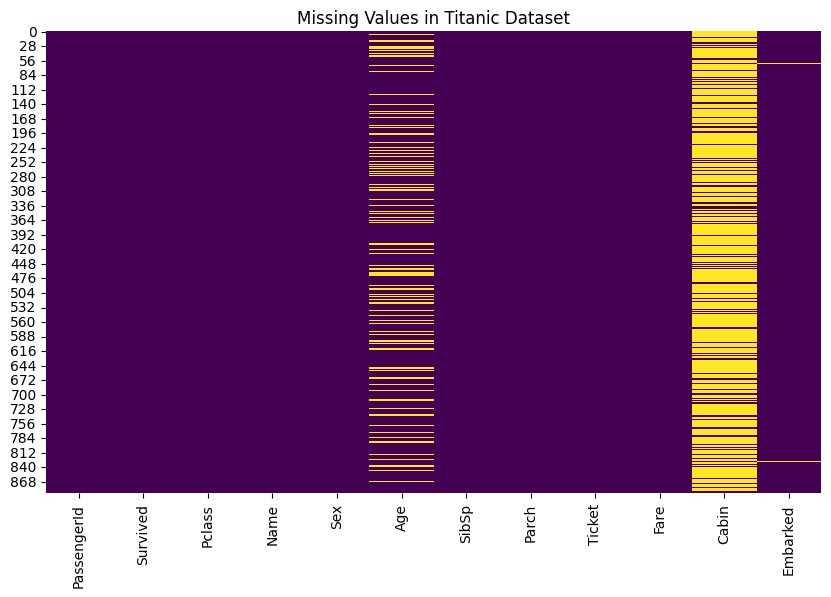

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titanic Dataset")
plt.show()

# 3. 결측치 처리

In [31]:
# Cabin의 경우 결측률이 70% 이상으로 높은 편이기 때문에 열 삭제가 적합할 것으로 판단함
df = df.drop(columns=['Cabin'])

In [32]:
# Age의 경우 수치형 변수로, 연속형(numerical) 변수. 다른 변수와의 상관 관계를 활용해 iterative 처리가 효과적일 것으로 판단함
# Fare, Pclass, SibSp, Parch 등과의 상관관계가 있을 것이라 판단함
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

imp = IterativeImputer()
df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']] = imp.fit_transform(df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])

In [33]:
# Embarked : 결측률이 낮기 때문에 최빈값으로 결측치 채움
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 4. Age 컬럼의 이상치 탐지 및 제거

<Axes: xlabel='Age'>

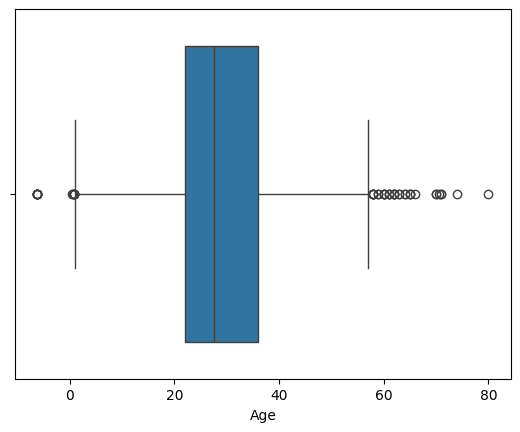

In [35]:
sns.boxplot(x=df['Age'])

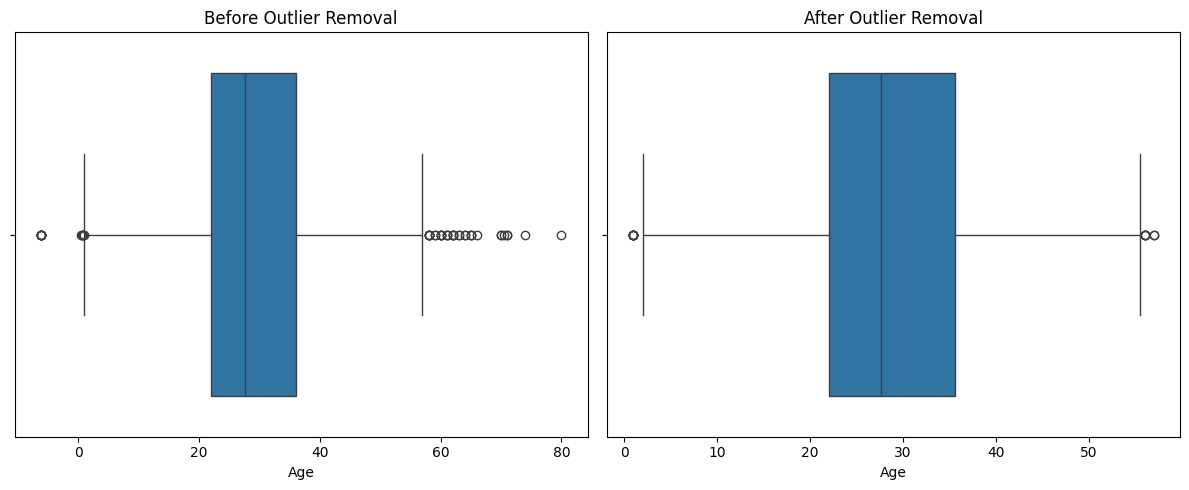

In [36]:
# Q1 은 1사분위수(25%), Q3은 3사분위수(75%)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1 # 데이터의 중간 50% 범위

# 2. 이상치 기준 설정
#정규분포라면 약 99.3%의 데이터,양쪽 극단에 있는 약 0.7% (좌우 0.35%씩)가 이상치로 간주
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)].copy()

#이상치 제거 전/후 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Before Outlier Removal')

sns.boxplot(x=df_cleaned['Age'], ax=axes[1])
axes[1].set_title('After Outlier Removal')
plt.tight_layout()
plt.show()

In [38]:
# 전처리
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
# df.dropna(inplace=True)  # 결측치 제거인데 안 해도 됨 앞에서 했음

# 범주형 → 숫자로 변환
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 입력/출력 나누기
X = df.drop(columns=['Survived'])
y = df['Survived']

# 학습용/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 스케일링 함수 정의 (수정하지 마세요)
def scale_age(X_train, X_test, scaler):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled['Age'] = scaler.fit_transform(X_train[['Age']])
    X_test_scaled['Age'] = scaler.transform(X_test[['Age']])
    return X_train_scaled, X_test_scaled


# ✅ KNN 평가 함수 (수정하지 마세요)
def evaluate_knn(X_train, X_test, y_train, y_test, label):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{label:<20} Accuracy: {acc:.4f}')

#✅ 아래 코드를 실행하려면 빈칸을 채워보세요
# 1. 스케일링 없이 원본 데이터로 평가
evaluate_knn(X_train, X_test, y_train, y_test, "No Scaling")

# 2. StandardScaler 적용
X_train_std, X_test_std = scale_age(X_train, X_test, StandardScaler())
evaluate_knn(X_train_std, X_test_std, y_train, y_test, "StandardScaler")

# 3. MinMaxScaler 적용
X_train_minmax, X_test_minmax = scale_age(X_train, X_test, MinMaxScaler())
evaluate_knn(X_train_minmax, X_test_minmax, y_train, y_test, "MinMaxScaler")

# 4. RobustScaler 적용
X_train_robust, X_test_robust = scale_age(X_train, X_test, RobustScaler())
evaluate_knn(X_train_robust, X_test_robust, y_train, y_test, "RobustScaler")


No Scaling           Accuracy: 0.7207
StandardScaler       Accuracy: 0.7765
MinMaxScaler         Accuracy: 0.8101
RobustScaler         Accuracy: 0.7709


<ipython-input-38-991b36484447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-38-991b36484447>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [41]:
# 원본 데이터(전처리 전)
df_raw = pd.read_csv('/content/drive/My Drive/ML_Study/titanic/train.csv')

# 전처리 후 상태 <- 다 해뒀으니 그대로 복사
df_cleaned = df.copy()

# 비교
print("🔹 [전처리 전] df_raw")
print("- shape:", df_raw.shape)
print("- 컬럼 목록:", df_raw.columns.tolist())
print("- 결측치:\n", df_raw.isnull().sum())
df_raw.info()

print("\n\n🔹 [전처리 후] df_cleaned")
print("- shape:", df_cleaned.shape)
print("- 컬럼 목록:", df_cleaned.columns.tolist())
print("- 결측치:\n", df_cleaned.isnull().sum())
df_cleaned.info()

🔹 [전처리 전] df_raw
- shape: (891, 12)
- 컬럼 목록: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
- 결측치:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 

1. 행, 열 수 변화
-  전 : (891, 11) -> 후 : (891, 6)
2. 제거되거나 추가된 칼럼
- PassengerId, Name, Ticket, Cabin, SibSp, Parch <-  Survived, Pclass, Sex, Age, Fare, Embarked 를 제외하고 제거함
3. 결측치 처리 결과
- 처리 전 age 177, cabin 687, embarked 2 -> 처리 후 전부 0 (cabin은 컬럼 삭제)
4. 데이터 자료형 비교
- Sex, Embarked : 전처리 전	object -> 전처리 후	int64
- 수치형으로 변환